<a href="https://colab.research.google.com/github/KarenYu729/Pytorch-Note/blob/main/LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

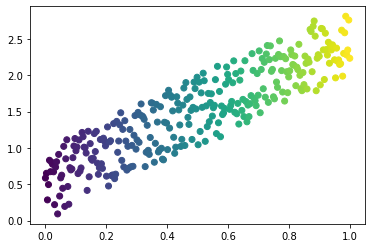

torch.Size([300, 1])
LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


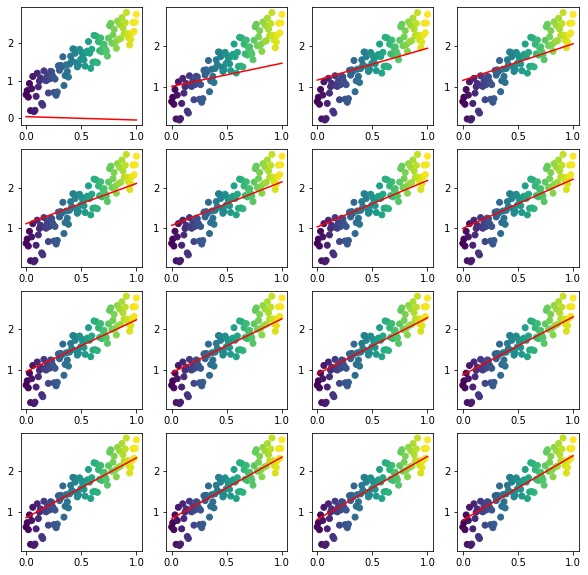

In [ ]:
import torch 
import matplotlib.pyplot as plt

def create_linear_data(nums_data, if_plot= False):
    """
    Create data for linear model
    Args:
        nums_data: how many data points that wanted
    Returns:
        x with shape (nums_data, 1)
    """
    x = torch.linspace(0,1,nums_data)
    x = torch.unsqueeze(x,dim=1)
    k = 2
    y = k * x + torch.rand(x.size())
    
    if if_plot:
        plt.scatter(x.numpy(),y.numpy(),c=x.numpy())
        plt.show()
    data = {"x":x, "y":y}
    return data

data = create_linear_data(300, if_plot=True)
print(data["x"].size())


class LinearRegression(torch.nn.Module):
    """
    Linear Regressoin Module, the input features and output 
    features are defaults both 1
    """
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1,1)
        
    def forward(self,x):
        out = self.linear(x)
        return out
linear = LinearRegression()
print(linear)

class Linear_Model():
    def __init__(self):
        """
        Initialize the Linear Model
        """
        self.learning_rate = 0.001
        self.epoches = 10000
        self.loss_function = torch.nn.MSELoss()
        self.create_model()
    def create_model(self):
        self.model = LinearRegression()
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate)
    
    def train(self, data, model_save_path="model.pth"):
        """
        Train the model and save the parameters
        Args:
            model_save_path: saved name of model
            data: (x, y) = data, and y = kx + b
        Returns: 
            None
        """
        x = data["x"]
        y = data["y"]
        for epoch in range(self.epoches):
            prediction = self.model(x)
            loss = self.loss_function(prediction, y)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            if epoch % 500 == 0:
                print("epoch: {}, loss is: {}".format(epoch, loss.item()))
        torch.save(self.model.state_dict(), "linear.pth")
      
        
    def test(self, x, model_path="linear.pth"):
        """
        Reload and test the model, plot the prediction
        Args:
            model_path: the model's path and name
            data: (x, y) = data, and y = kx + b
        Returns:
            None
        """
        x = data["x"]
        y = data["y"]
        self.model.load_state_dict(torch.load(model_path))
        prediction = self.model(x)
        
        plt.scatter(x.numpy(), y.numpy(), c=x.numpy())
        plt.plot(x.numpy(), prediction.detach().numpy(), color="r")
        plt.show()
    def compare_epoches(self, data):
        x = data["x"]
        y = data["y"]
        
        num_pictures = 16
        fig = plt.figure(figsize=(10,10))
        current_fig = 0
        for epoch in range(self.epoches):
            prediction = self.model(x)
            loss = self.loss_function(prediction, y)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            if epoch % (self.epoches/num_pictures) == 0:
                current_fig += 1
                plt.subplot(4, 4, current_fig)
                plt.scatter(x.numpy(), y.numpy(), c=x.numpy())
                plt.plot(x.numpy(), prediction.detach().numpy(), color="r")
        plt.show()
            
linear = Linear_Model()
data = create_linear_data(100)
linear.compare_epoches(data)

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn import datasets

#Iris dataset was used here
iris=datasets.load_iris()
# Input 
inputs = iris['data']
# Targets 
targets = iris['target']

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

print(inputs)
print(targets)

# Tensor Data set 
from torch.utils.data import TensorDataset
# Define dataset
train_ds = TensorDataset(inputs, targets.to(torch.float32))
#tensor = tensor.to(torch.float32)
#Data loader
from torch.utils.data import DataLoader
# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

# Define linear model
"""
variables in nn.Linear:
 (in_features, out_features, bias = True)
 bias has a default:True, means this module has bias
 The dataset has 3 input features, and 2 outputs
"""
model = nn.Linear(4,1)
print(model.weight)
print(model.bias)
# Parameters
list(model.parameters())
# Define Loss
import torch.nn.functional as F
loss_fn = F.mse_loss
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)
#lr for learning rate

# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb.to(torch.float32))
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
#fit model for 100 epochs
fit(100,model,loss_fn,opt,train_dl)
# Generate predictions
preds = model(inputs.to(torch.float32))

print(preds)

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.


Epoch [10/100], Loss: 11.4066
Epoch [20/100], Loss: 5.2519
Epoch [30/100], Loss: 4.3849
Epoch [40/100], Loss: 2.9140
Epoch [50/100], Loss: 1.1205
Epoch [60/100], Loss: 0.8535
Epoch [70/100], Loss: 1.5388
Epoch [80/100], Loss: 1.1093
Epoch [90/100], Loss: 0.4879
Epoch [100/100], Loss: 0.8978
tensor([[0.4087],
        [0.4207],
        [0.3554],
        [0.3322],
        [0.3732],
        [0.4772],
        [0.3333],
        [0.3912],
        [0.3144],
        [0.3722],
        [0.4502],
        [0.3383],
        [0.3661],
        [0.2648],
        [0.5262],
        [0.5001],
        [0.4999],
        [0.4397],
        [0.5290],
        [0.3984],
        [0.4745],
        [0.4413],
        [0.3013],
        [0.5085],
        [0.3212],
        [0.4330],
        [0.4476],
        [0.4267],
        [0.4442],
        [0.3383],
        [0.3739],
        [0.5479],
        [0.3244],
        [0.4202],
        [0.4032],
        [0.4320],
        [0.5089],
        [0.3185],
        [0.3082],
      

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


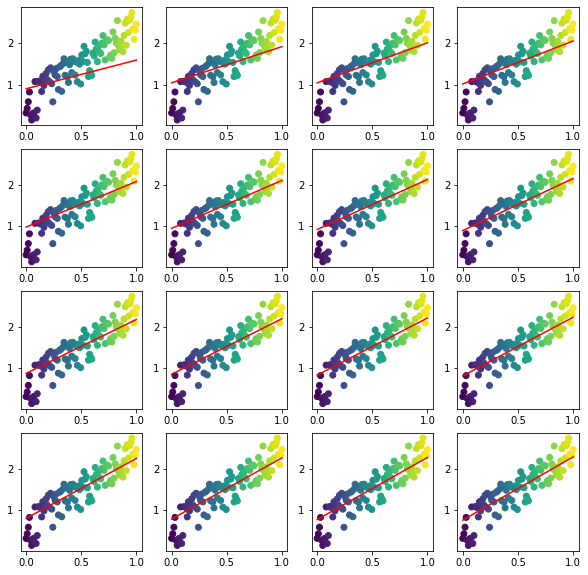

In [3]:
import torch 
import matplotlib.pyplot as plt

def create_linear_data(nums_data, if_plot= False):
    """
    Create data for linear model
    Args:
        nums_data: how many data points that wanted
    Returns:
        x with shape (nums_data, 1)
    """
    x = torch.linspace(0,1,nums_data)
    x = torch.unsqueeze(x,dim=1)
    k = 2
    y = k * x + torch.rand(x.size())
    
    if if_plot:
        plt.scatter(x.numpy(),y.numpy(),c=x.numpy())
        plt.show()
    data = {"x":x, "y":y}
    return data
#Iris dataset was used here
data=datasets.load_iris()




class LinearRegression(torch.nn.Module):
    """
    Linear Regressoin Module, the input features and output 
    features are defaults both 1
    """
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1,1)
        
    def forward(self,x):
        out = self.linear(x)
        return out
linear = LinearRegression()
print(linear)

class Linear_Model():
    def __init__(self):
        """
        Initialize the Linear Model
        """
        self.learning_rate = 0.001
        self.epoches = 10000
        self.loss_function = torch.nn.MSELoss()
        self.create_model()
    def create_model(self):
        self.model = LinearRegression()
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate)
    
    def train(self, data, model_save_path="model.pth"):
        """
        Train the model and save the parameters
        Args:
            model_save_path: saved name of model
            data: (x, y) = data, and y = kx + b
        Returns: 
            None
        """
        x = data["x"]
        y = data["y"]
        for epoch in range(self.epoches):
            prediction = self.model(x)
            loss = self.loss_function(prediction, y)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            if epoch % 500 == 0:
                print("epoch: {}, loss is: {}".format(epoch, loss.item()))
        torch.save(self.model.state_dict(), "linear.pth")
      
        
    def test(self, x, model_path="linear.pth"):
        """
        Reload and test the model, plot the prediction
        Args:
            model_path: the model's path and name
            data: (x, y) = data, and y = kx + b
        Returns:
            None
        """
        x = data["x"]
        y = data["y"]
        self.model.load_state_dict(torch.load(model_path))
        prediction = self.model(x)
        
        plt.scatter(x.numpy(), y.numpy(), c=x.numpy())
        plt.plot(x.numpy(), prediction.detach().numpy(), color="r")
        plt.show()
    def compare_epoches(self, data):
        x = data["x"]
        y = data["y"]
        
        num_pictures = 16
        fig = plt.figure(figsize=(10,10))
        current_fig = 0
        for epoch in range(self.epoches):
            prediction = self.model(x)
            loss = self.loss_function(prediction, y)

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            if epoch % (self.epoches/num_pictures) == 0:
                current_fig += 1
                plt.subplot(4, 4, current_fig)
                plt.scatter(x.numpy(), y.numpy(), c=x.numpy())
                plt.plot(x.numpy(), prediction.detach().numpy(), color="r")
        plt.show()
            
linear = Linear_Model()
data = create_linear_data(100)
linear.compare_epoches(data)